In [1]:
import psrchive
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import chirp, find_peaks, peak_widths
from scipy.optimize import curve_fit
import scipy.optimize as opt
from scipy.cluster.vq import kmeans, vq 
import scipy.stats as stats

In [2]:
#Define the function to minimize with the Downhill-Simplex algorithm
def minimize_func(p, x, y):
    if np.any(p < 0):
        return np.inf
    return np.sum((y - gaussian(x, *p))**2)

#Define the function to minimize with the Downhill-Simplex algorithm
def minimize_func2(p, x, y):
    if np.any(p < 0):
        return np.inf
    return np.sum((y - _2gaussian(x, *p))**2)

#Define the function to minimize with the Downhill-Simplex algorithm
def minimize_func3(p, x, y):
    if np.any(p < 0):
        return np.inf
    return np.sum((y - _3gaussian(x, *p))**2)

#Define the function to minimize with the Downhill-Simplex algorithm
def minimize_func4(p, x, y):
    if np.any(p < 0):
        return np.inf
    return np.sum((y - _4gaussian(x, *p))**2)

#Define the function to minimize with the Downhill-Simplex algorithm
def minimize_func5(p, x, y):
    if np.any(p < 0):
        return np.inf
    return np.sum((y - multigaussian(x, *p))**2)

In [3]:
#Define the function to minimize with the LM algorithm
def fit_func(p, x, y):
    if np.any(p<0):
        return np.inf
    return y - gaussian(x, *p)

#Define the function to minimize with the LM algorithm
def fit_func2(p, x, y):
    if np.any(p<0):
        return np.inf
    return y - _2gaussian(x, *p)

#Define the function to minimize with the LM algorithm
def fit_func3(p, x, y):
    if np.any(p<0):
        return np.inf
    return y - _3gaussian(x, *p)

#Define the function to minimize with the LM algorithm
def fit_func4(p, x, y):
    if np.any(p<0):
        return np.inf
    return y - _4gaussian(x, *p)

#Define the function to minimize with the LM algorithm
def fit_func5(p, x, y):
    if np.any(p<0):
        return np.inf
    return y - multigaussian(x, *p)

In [4]:
#Define a Gaussian and its different parameters
def gaussian(x, amp1,cen1,sigma1,b):
    return amp1*(1/(sigma1*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x-cen1)/sigma1)**2))) + b

In [5]:
#Define a profile with 4 aded gaussians
def _2gaussian(x, A1, p1, w1, A2, p2, w2, b):
    return A1*np.exp(-4*np.log(2)*((x-p1)/w1)**2) + \
            A2*np.exp(-4*np.log(2)*((x-p2)/w2)**2) + b

In [6]:
#Define a profile with 4 aded gaussians
def _3gaussian(x, A1, p1, w1, A2, p2, w2, A3, p3, w3, b):
    return A1*np.exp(-4*np.log(2)*((x-p1)/w1)**2) + \
            A2*np.exp(-4*np.log(2)*((x-p2)/w2)**2) + \
             A3*np.exp(-4*np.log(2)*((x-p3)/w3)**2) + b

In [7]:
#Define a profile with 4 aded gaussians
def _4gaussian(x, A1, p1, w1, A2, p2, w2, A3, p3, w3, A4, p4, w4, b):
    return A1*np.exp(-4*np.log(2)*((x-p1)/w1)**2) + \
            A2*np.exp(-4*np.log(2)*((x-p2)/w2)**2) + \
             A3*np.exp(-4*np.log(2)*((x-p3)/w3)**2) + \
              A4*np.exp(-4*np.log(2)*((x-p4)/w4)**2) + b

In [8]:
#Define a profile with 5 added gaussians
def multigaussian(x, A1, p1, w1, A2, p2, w2, A3, p3, w3, A4, p4, w4, A5, p5, w5, b):
    return A1*np.exp(-4*np.log(2)*((x-p1)/w1)**2) + \
            A2*np.exp(-4*np.log(2)*((x-p2)/w2)**2) + \
             A3*np.exp(-4*np.log(2)*((x-p3)/w3)**2) + \
              A4*np.exp(-4*np.log(2)*((x-p4)/w4)**2) + \
               A5*np.exp(-4*np.log(2)*((x-p5)/w5)**2) + b

In [9]:
# Load data
a = psrchive.Archive_load('/srv/storage_11/galc/UBB/jtremblay/20220913/added_clean/B0355+54_added.ar.10chns.pazi')
a.tscrunch()
a.dedisperse()
a.pscrunch()
a.remove_baseline()
data = a.get_data()
print("data shape: " + str(data.shape))

data shape: (1, 1, 10, 1024)


In [10]:
# Get weights
ww = np.array(a.get_weights(), dtype=bool)
# Create array with only True with same shape as data
wts = np.ones(data.shape, dtype=bool)
print("ww shape: " + str(np.shape(ww)))
print("wts shape: " + str(np.shape(wts)))

ww shape: (1, 10)
wts shape: (1, 1, 10, 1024)


In [11]:
# If True in ww, set to false in wts
# Essentially, creates the opposite of ww
wts[...,ww,:] = False

In [12]:
# set all values in data with True in wts to nan
mata = data.copy()
mata[wts] = np.nan

In [13]:
#Create an array to store the normalized values
mata_norm = []
#Select only the arrays we are interested in
matadata = mata[0,0,:]

#For loop used to normalize channels between 0 and 40
for i in range(0,10):
    #Select the frequency channel number to normalise
    matadata_current = matadata[i]
    #Perform the normalisation from 0 to 1 on the y axis
    mata_normalized = (matadata_current - np.min(matadata_current))/(np.max(matadata_current) - np.min(matadata_current))
    #Append normalized value to array for normalized values
    mata_norm.append(mata_normalized)

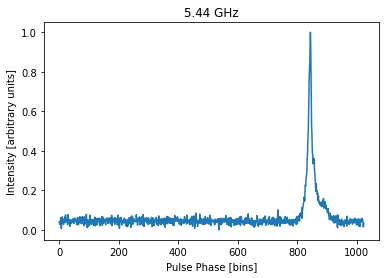

In [46]:
#Plot the normalized data
plt.plot(mata_norm[9])
plt.title('5.44 GHz')
plt.xlabel('Pulse Phase [bins]')
plt.ylabel('Intensity [arbitrary units]')
plt.show()

### Now that we have the data we will select the different regions of the pulse

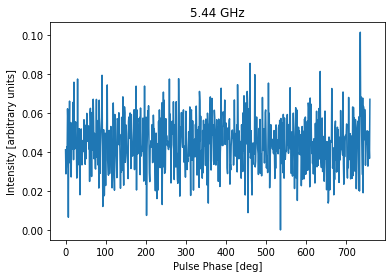

In [15]:
#Plot the left off-pulse normalized data
left_off_pulse = mata_norm[9][0:760]
plt.plot(left_off_pulse)
plt.title('5.44 GHz')
plt.xlabel('Pulse Phase [deg]')
plt.ylabel('Intensity [arbitrary units]')
plt.show()

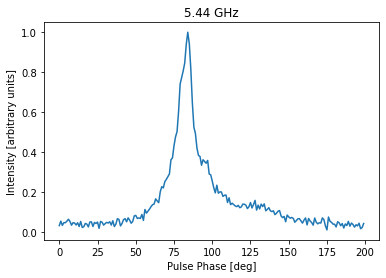

In [16]:
#Plot the on-pulse normalized data
on_pulse = mata_norm[9][760:960]
plt.plot(on_pulse)
plt.title('5.44 GHz')
plt.xlabel('Pulse Phase [deg]')
plt.ylabel('Intensity [arbitrary units]')
plt.show()

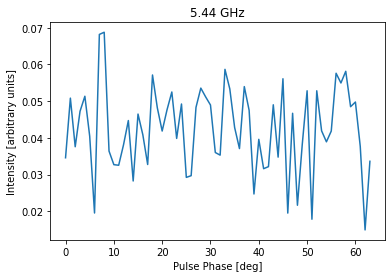

In [17]:
#Plot the right off-pulse normalized data
right_off_pulse = mata_norm[9][960:1024]
plt.plot(right_off_pulse)
plt.title('5.44 GHz')
plt.xlabel('Pulse Phase [deg]')
plt.ylabel('Intensity [arbitrary units]')
plt.show()

### We define the highest peak of the pulse to be the centre and amplitude of the first Gaussian

In [18]:
gauss_peak = max(on_pulse)
print("Amplitude: " + str(gauss_peak))

center_peak = np.where(on_pulse == 1)[0][0]
print("Center: " + str(center_peak))

Amplitude: 1.0
Center: 84


In [19]:
#Define a list of x values
x = np.linspace(0,len(on_pulse),len(on_pulse))

In [20]:
#Create the curve fit (p0 are the Gaussian parameter estimates that we give)
p0 = np.array([10, 8.36577093e+01, 4.2,7.71653492e-02])
gaussian_arr = gaussian(x, p0[0], p0[1], p0[2], p0[3])  
#Original Parameters: 1.44940079e+01, 8.36577093e+01, 8.05135588e+00,7.71653492e-02

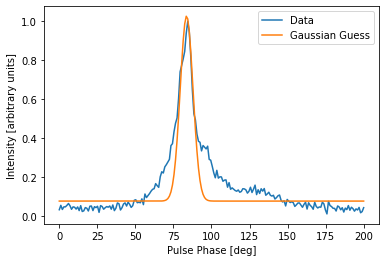

In [21]:
#Plot the data and the fit
plt.plot(x, on_pulse, label='Data')
plt.plot(x, gaussian_arr, label='Gaussian Guess')
plt.xlabel('Pulse Phase [deg]')
plt.ylabel('Intensity [arbitrary units]')
plt.legend()
plt.show()

### Now that we have an initial guess for the parameters we will execute the fit-algorithms

First we start with the Downhill-Simplex algorithm:

In [22]:
#k is the frequency channel 
k = 9

In [23]:
#Use the Downhill-Simplex algorithm to generate initial guess parameters for the fit 
bounds = ([0,0,0,0], [1023, np.inf, np.inf, np.inf])
result = opt.minimize(minimize_func, p0, args=(x, on_pulse), method='Nelder-Mead')
initial_guess = result.x

In [24]:
print("Initial Params from the Downhill-Simplex algorithm: " + str(initial_guess))

Initial Params from the Downhill-Simplex algorithm: [1.44938064e+01 8.36576542e+01 8.05114724e+00 7.71665387e-02]


Now we will use these guess parameters to start the Levenberg-Marquardt algorithm

In [25]:
#Use the levenberg-Marquardt algorithm  to estimate the final fit parameters
popt_gauss, pcov_gauss = opt.curve_fit(gaussian, x, on_pulse, p0=[initial_guess], method='lm', maxfev=1000000)
#Print the fit parameters returned by the LM algorithm
print(popt_gauss)

[1.44937740e+01 8.36576590e+01 8.05113290e+00 7.71665128e-02]


Now we can create a distribution with these parameters

In [26]:
#Create the curve fit (p0 are the Gaussian parameter estimates that we give)
params = popt_gauss
fit_dist = gaussian(x, params[0], params[1], params[2], params[3])

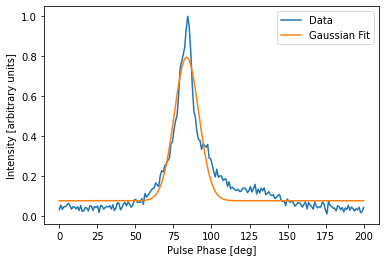

In [27]:
#Plot the data and the fit
plt.plot(x, on_pulse, label='Data')
plt.plot(x, fit_dist, label='Gaussian Fit')
plt.xlabel('Pulse Phase [deg]')
plt.ylabel('Intensity [arbitrary units]')
plt.legend()
plt.show()

Now we run some statistics on the fits:

In [28]:
alpha = 0.05 #We set our significance at 5%

Start with the F-tests

In [29]:
F = np.var(fit_dist) / np.var(on_pulse)
print("First F-test: " + str(F))

F2 = stats.f_oneway(fit_dist,on_pulse)
print("One-way F-test: " + str(F2))

First F-test: 0.9109076675002873
One-way F-test: F_onewayResult(statistic=8.22318600235942e-19, pvalue=1.0)


Now we can do the Student's-T-tests:

In [30]:
StudentT = stats.ttest_ind(fit_dist, on_pulse)
print("Student-T-test: " + str(StudentT))

Student-T-test: Ttest_indResult(statistic=2.647134648605738e-08, pvalue=0.9999999788921842)


Now we do a non-parametric Kolmogorov-Smirnov-test

In [31]:
KS_test = stats.kstest(fit_dist, on_pulse)
print("KS-test: " + str(KS_test))

KS-test: KstestResult(statistic=0.525, pvalue=1.540690216744271e-25)


### If the p-value of the KS-test is under 0.05 then we add a gaussian and try again

First we start with the Downhill-Simplex algorithm:

In [32]:
#Use the Downhill-Simplex algorithm to generate initial guess parameters for the fit
p02 = np.array([1,840,14, 1,840,14, 1.77772905e-02])
bounds = ([0,0,0,0,0,0,0], [1023, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf])
result2 = opt.minimize(minimize_func2, p02, args=(x, on_pulse), method='Nelder-Mead')
initial_guess2 = result2.x

In [33]:
print("Initial Params from the Downhill-Simplex algorithm: " + str(initial_guess2))

Initial Params from the Downhill-Simplex algorithm: [7.17162240e-01 8.37419320e+01 2.05554035e+01 4.53434148e-06
 1.20278708e+03 3.36130267e-01 5.37958404e-02]


Now we will use these guess parameters to start the Levenberg-Marquardt algorithm

In [34]:
#Use the levenberg-Marquardt algorithm  to estimate the final fit parameters
popt_gauss2, pcov_gauss2 = opt.curve_fit(_2gaussian, x, on_pulse, p0=[initial_guess2], method='lm', maxfev=1000000)
#Print the fit parameters returned by the LM algorithm
print(popt_gauss2)

[7.18173661e-01 8.36577100e+01 1.89595008e+01 4.53434148e-06
 1.20278708e+03 3.36130267e-01 7.71653346e-02]


/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Now we can create a distribution with these parameters

In [35]:
#Create the curve fit (p0 are the Gaussian parameter estimates that we give)
params2 = popt_gauss2
fit_dist2 = _2gaussian(x, params2[0], params2[1], params2[2], params2[3], params2[4], params2[5], params2[6])

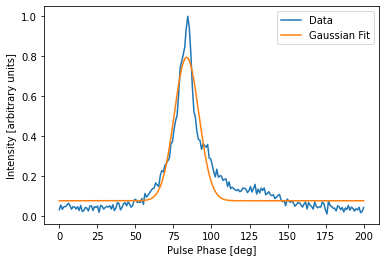

In [36]:
#Plot the data and the fit
plt.plot(x, on_pulse, label='Data')
plt.plot(x, fit_dist2, label='Gaussian Fit')
plt.xlabel('Pulse Phase [deg]')
plt.ylabel('Intensity [arbitrary units]')
plt.legend()
plt.show()

In [37]:
F = np.var(fit_dist2) / np.var(on_pulse)
print("First F-test: " + str(F))

F2 = stats.f_oneway(fit_dist2,on_pulse)
print("One-way F-test: " + str(F2))

First F-test: 0.9109076661751014
One-way F-test: F_onewayResult(statistic=1.032465692149594e-18, pvalue=1.0)


In [38]:
StudentT = stats.ttest_ind(fit_dist2, on_pulse)
print("Student-T-test: " + str(StudentT))

Student-T-test: Ttest_indResult(statistic=2.63620602949794e-08, pvalue=0.9999999789793272)


In [39]:
KS_test = stats.kstest(fit_dist2, on_pulse)
print("KS-test: " + str(KS_test))

KS-test: KstestResult(statistic=0.525, pvalue=1.540690216744271e-25)


### If the p-value of the KS-test is under 0.05 then we add a gaussian and try again

In [40]:
#Use the Downhill-Simplex algorithm to generate initial guess parameters for the fit
p03 = np.array([1,840,14, 1,840,14, 1,840,14, 5.09053790e-02])
result3 = opt.minimize(minimize_func3, p03, args=(x, on_pulse), method='Nelder-Mead', bounds='0,200')
initial_guess3 = result3.x

/usr/local/lib/python3.6/dist-packages/scipy/optimize/_minimize.py:534: RuntimeWarning: Method Nelder-Mead cannot handle constraints nor bounds.
  RuntimeWarning)


In [41]:
print("Initial Params from the Downhill-Simplex algorithm: " + str(initial_guess3))

Initial Params from the Downhill-Simplex algorithm: [1.53641689e+00 9.62107505e+02 7.71585010e+00 6.11064487e-01
 1.55232335e+03 1.34827541e+01 5.57013776e-01 5.63369139e+02
 4.39046797e+00 1.49273039e-01]


In [42]:
#Use the levenberg-Marquardt algorithm  to estimate the final fit parameters
popt_gauss3, pcov_gauss3 = opt.curve_fit(_3gaussian, x, on_pulse, p0=[initial_guess3], method='lm', maxfev=1000000)
#Print the fit parameters returned by the LM algorithm
print(popt_gauss3)

[1.53641689e+00 9.62107505e+02 7.71585010e+00 6.11064487e-01
 1.55232335e+03 1.34827541e+01 5.57013776e-01 5.63369139e+02
 4.39046797e+00 1.49273039e-01]


/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [43]:
#Create the curve fit (p0 are the Gaussian parameter estimates that we give)
params3 = popt_gauss3
fit_dist3 = _3gaussian(x, params3[0], params3[1], params3[2], params3[3], params3[4], params3[5], params3[6], params3[7], params3[8], params3[9])

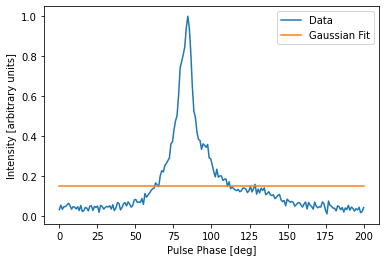

In [44]:
#Plot the data and the fit
plt.plot(x, on_pulse, label='Data')
plt.plot(x, fit_dist3, label='Gaussian Fit')
plt.xlabel('Pulse Phase [deg]')
plt.ylabel('Intensity [arbitrary units]')
plt.legend()
plt.show()

In [45]:
print(len(on_pulse))

200
